In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('weather2.csv')
df.head()

,Temp_C,Rel Hum_%,Wind Speed_km/h,Press_kPa,Percip
0,-1.8,86,4,101.24,0
1,-1.8,87,4,101.24,0
2,-1.8,89,7,101.26,0
3,-1.5,88,6,101.27,0
4,-1.5,88,7,101.23,0


In [3]:
# pip install colorblind

In [4]:
# extracting the independent variables (features) and 
# the dependent variable (target) from the dataset:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [5]:
len(X)

8784

In [6]:
len(Y)

8784

In [7]:
print(X)

[[ -1.8   86.     4.   101.24]
 [ -1.8   87.     4.   101.24]
 [ -1.8   89.     7.   101.26]
 ...
 [ -0.5   93.    28.    99.95]
 [ -0.2   89.    28.    99.91]
 [  0.    86.    30.    99.89]]


In [8]:
print(Y)

[0 0 0 ... 2 2 2]


In [9]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
# fitting a linear regression model to the training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [11]:
# predicting the target variable using the linear regression model on the test set
Y_pred_linear = regressor.predict(X_test)

In [12]:
print(Y_pred_linear)

[ 0.36302444  0.21568573  0.09924277 ...  0.21423915 -0.03618612
 -0.10461496]


In [13]:
# calculating the root mean squared error (RMSE) and 
# the R-squared score for the linear regression model
from sklearn.metrics import mean_squared_error, r2_score
rmse_linear = np.sqrt(mean_squared_error(Y_test, Y_pred_linear))
r2_linear = r2_score(Y_test, Y_pred_linear)
print('MSE:', rmse_linear)
print('R-squared score:', rmse_linear)

MSE: 0.4895580166356826
R-squared score: 0.4895580166356826


In [14]:
# Cross-validation
from sklearn.model_selection import cross_val_score
degrees = [1, 2, 3, 4, 5]
cv_rmse = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    scores = np.sqrt(-cross_val_score(LinearRegression(), X_poly, Y, cv=5, scoring='neg_mean_squared_error'))
    cv_rmse.append(scores.mean())

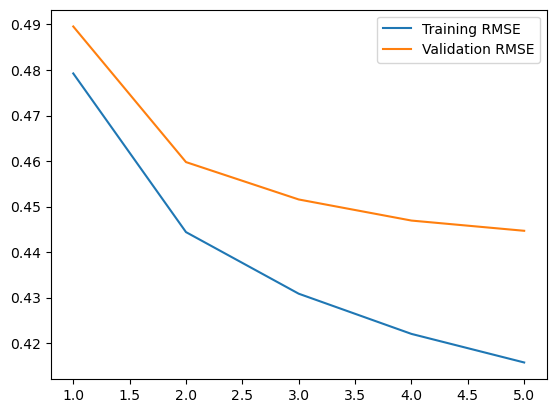

In [15]:
# bias-variance tradeoff
degrees = [1, 2, 3, 4, 5]
train_rmse = []
val_rmse = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, Y_train)
    Y_train_pred = poly_regressor.predict(X_train_poly)
    Y_test_pred = poly_regressor.predict(X_test_poly)
    train_rmse.append(np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    val_rmse.append(np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
    
plt.plot(degrees, train_rmse, label='Training RMSE')
plt.plot(degrees, val_rmse, label='Validation RMSE')
plt.legend()
plt.savefig('Bias-Variance Plot.png')
plt.show()

In [16]:
# comparing the results and selecting the degree of the 
# polynomial regression model that has the lowest validation error
cv_rmse = np.array(cv_rmse)
val_rmse = np.array(val_rmse)

best_degree = np.argmin(val_rmse) + 1
print(f"Best degree based on Cross-validation: {np.argmin(cv_rmse) + 1}")
print(f"Best degree based on bias-variance tradeoff: {best_degree}")

Best degree based on Cross-validation: 2
Best degree based on bias-variance tradeoff: 5


In [17]:
# First using the degree 2 polynomial model

In [18]:
# fitting a polynomial regression model to the training set with a chosen degree (2)
poly_features_1 = PolynomialFeatures(degree=2)
X_train_poly_1 = poly_features_1.fit_transform(X_train)
poly_regressor_1 = LinearRegression()
poly_regressor_1.fit(X_train_poly_1, Y_train)

LinearRegression()

In [19]:
# predicting the target variable using the polynomial regression model
# on the test set
X_test_poly_1 = poly_features.transform(X_test)
Y_pred_poly_1 = poly_regressor.predict(X_test_poly_1)

In [20]:
# calculating the root mean squared error (RMSE) and 
# the R-squared score for the polynomial regression model
rmse_poly_1 = np.sqrt(mean_squared_error(Y_test, Y_pred_poly_1))
r2_poly_1 = r2_score(Y_test, Y_pred_poly_1)
print('MSE:', rmse_poly_1)
print('R-squared score:', r2_poly_1)

MSE: 0.44467509347112355
R-squared score: 0.35878040859228955


In [21]:
# Now using the degree 5 polynomial model

In [22]:
# fitting a polynomial regression model to the training set with a chosen degree (2)
poly_features_2 = PolynomialFeatures(degree=5)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
poly_regressor_2 = LinearRegression()
poly_regressor_2.fit(X_train_poly_2, Y_train)

LinearRegression()

In [23]:
# predicting the target variable using the polynomial regression model
# on the test set
X_test_poly_2 = poly_features.transform(X_test)
Y_pred_poly_2 = poly_regressor.predict(X_test_poly_2)

In [24]:
# calculating the root mean squared error (RMSE) and 
# the R-squared score for the polynomial regression model
rmse_poly_2 = np.sqrt(mean_squared_error(Y_test, Y_pred_poly_2))
r2_poly_2 = r2_score(Y_test, Y_pred_poly_2)
print('MSE:', rmse_poly_2)
print('R-squared score:', r2_poly_2)

MSE: 0.44467509347112355
R-squared score: 0.35878040859228955


In [25]:
# plotting
# Using 2 different colorblind paletts

7027
7027
1757
1757
Linear Regression:
MSE: 0.4895580166356826
R-squared score: 0.2228058798866478
Polynomial Regression (degree=2):
MSE: 0.45976594555964045
R-squared score: 0.3145200227432611


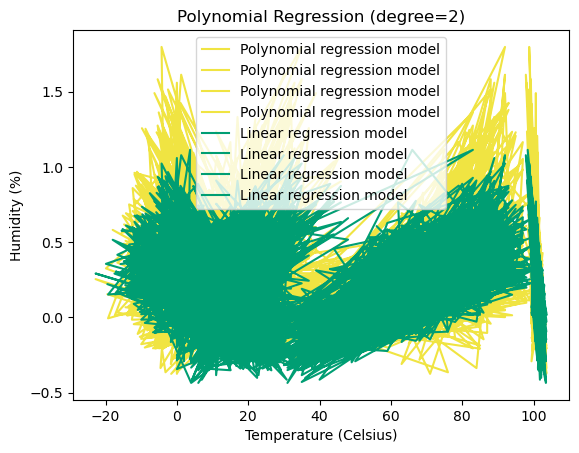

Polynomial Regression (degree=5):
MSE: 0.44467509347112355
R-squared score: 0.35878040859228955


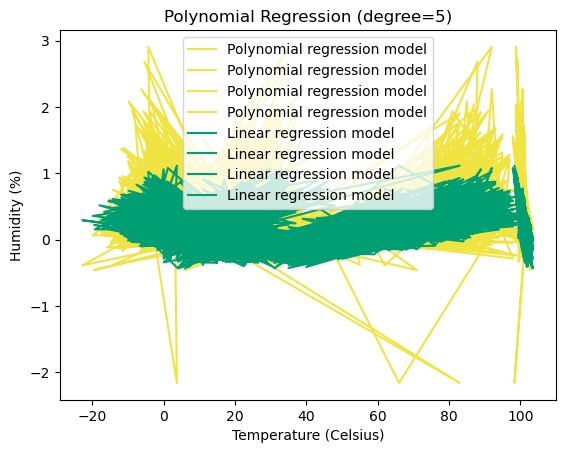

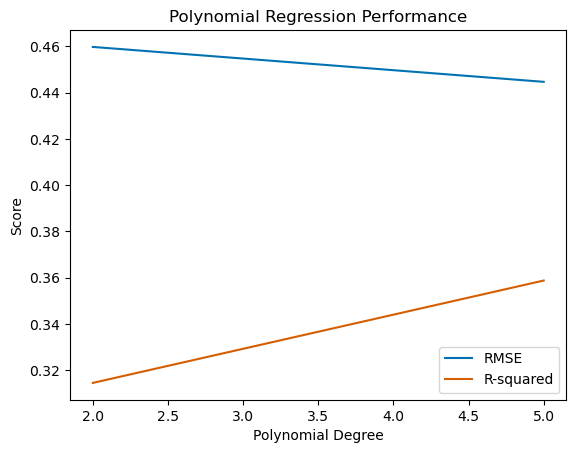

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from cycler import cycler

# Set colorblind friendly palette
colors = ['#0072B2', '#D55E00', '#F0E442', '#009E73', '#56B4E9']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# colors = sns.color_palette("colorblind")

# Load data
df = pd.read_csv('weather2.csv')

# Split data into features and target variable
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

# Fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predict target variable using linear regression model on test data
Y_pred_linear = regressor.predict(X_test)

# Calculate root mean squared error (RMSE) and R-squared score for linear regression model
rmse_linear = np.sqrt(mean_squared_error(Y_test, Y_pred_linear))
r2_linear = r2_score(Y_test, Y_pred_linear)
print('Linear Regression:')
print('MSE:', rmse_linear)
print('R-squared score:', r2_linear)

# Fit polynomial regression models with degrees 2 and 5 to training data
degrees = [2, 5]
poly_rmse = []
poly_r2 = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, Y_train)
    
    # Predict target variable using polynomial regression model on test data
    X_test_poly = poly_features.transform(X_test)
    Y_pred_poly = poly_regressor.predict(X_test_poly)
    
    # Calculate RMSE and R-squared score for polynomial regression model
    rmse_poly = np.sqrt(mean_squared_error(Y_test, Y_pred_poly))
    r2_poly = r2_score(Y_test, Y_pred_poly)
    poly_rmse.append(rmse_poly)
    poly_r2.append(r2_poly)
    print(f'Polynomial Regression (degree={degree}):')
    print('MSE:', rmse_poly)
    print('R-squared score:', r2_poly)
    
    # Plot regression model
#     plt.scatter(X_test, Y_test, color=colors[0], label='Test data')
#     plt.scatter(X_test[:, 0], Y_test, color=colors[0], label='Test data')
#     plt.scatter(X_train, Y_train, color=colors[1], label='Training data')
#     plt.scatter(X_train[:, 0], Y_train, color=colors[1], label='Training data')
    plt.plot(X_test, Y_pred_poly, color=colors[2], label='Polynomial regression model')
    plt.plot(X_test, Y_pred_linear, color=colors[3], label='Linear regression model')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.xlabel('Temperature (Celsius)')
    plt.ylabel('Humidity (%)')
    plt.legend()
    plt.savefig(f'Polynomial Regression (degree={degree}).png')
    plt.show()
    
# Plot RMSE and R-squared score for polynomial regression models with degrees 2 and 5
plt.plot(degrees, poly_rmse, label='RMSE')
plt.plot(degrees, poly_r2, label='R-squared')
plt.title('Polynomial Regression Performance')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.legend()
plt.savefig('Comparison.png')
plt.show()


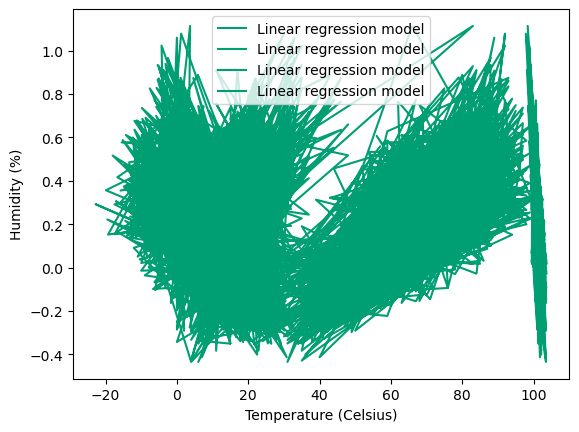

In [27]:
# plt.scatter(X_test[:, 0], Y_test, color=colors[0], label='Test data')
# plt.scatter(X_train[:, 0], Y_train, color=colors[1], label='Training data')
plt.plot(X_test, Y_pred_linear, color=colors[3], label='Linear regression model')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity (%)')
plt.legend()
plt.savefig('Linear Regression OP.png')
plt.show()

7027
7027
1757
1757
Linear Regression:
MSE: 0.4895580166356826
R-squared score: 0.2228058798866478
Polynomial Regression (degree=2):
MSE: 0.45976594555964045
R-squared score: 0.3145200227432611


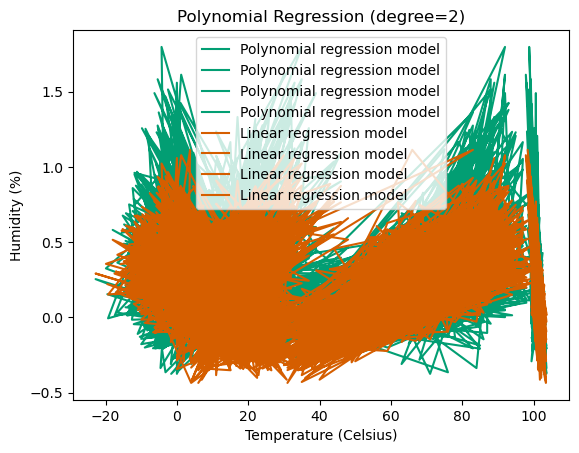

Polynomial Regression (degree=5):
MSE: 0.44467509347112355
R-squared score: 0.35878040859228955


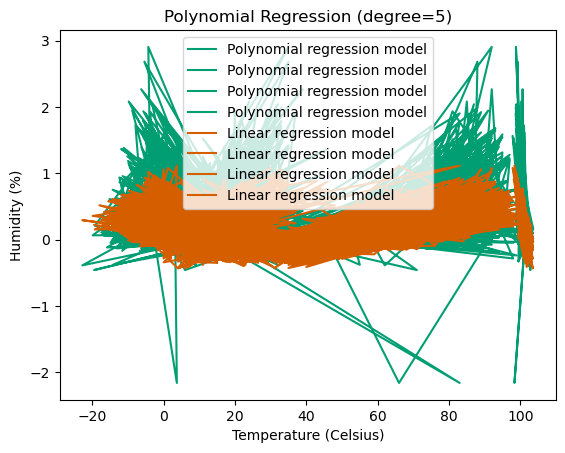

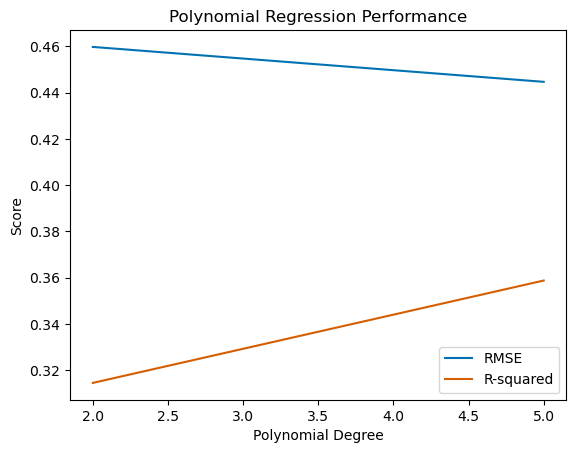

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from cycler import cycler

# Set colorblind friendly palette
# colors = ['#0072B2', '#D55E00', '#F0E442', '#009E73', '#56B4E9']
# plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
colors = sns.color_palette("colorblind")

# Load data
df = pd.read_csv('weather2.csv')

# Split data into features and target variable
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

# Fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predict target variable using linear regression model on test data
Y_pred_linear = regressor.predict(X_test)

# Calculate root mean squared error (RMSE) and R-squared score for linear regression model
rmse_linear = np.sqrt(mean_squared_error(Y_test, Y_pred_linear))
r2_linear = r2_score(Y_test, Y_pred_linear)
print('Linear Regression:')
print('MSE:', rmse_linear)
print('R-squared score:', r2_linear)

# Fit polynomial regression models with degrees 2 and 5 to training data
degrees = [2, 5]
poly_rmse = []
poly_r2 = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, Y_train)
    
    # Predict target variable using polynomial regression model on test data
    X_test_poly = poly_features.transform(X_test)
    Y_pred_poly = poly_regressor.predict(X_test_poly)
    
    # Calculate RMSE and R-squared score for polynomial regression model
    rmse_poly = np.sqrt(mean_squared_error(Y_test, Y_pred_poly))
    r2_poly = r2_score(Y_test, Y_pred_poly)
    poly_rmse.append(rmse_poly)
    poly_r2.append(r2_poly)
    print(f'Polynomial Regression (degree={degree}):')
    print('MSE:', rmse_poly)
    print('R-squared score:', r2_poly)
    
    # Plot regression model
#     plt.scatter(X_test, Y_test, color=colors[0], label='Test data')
#     plt.scatter(X_test[:, 0], Y_test, color=colors[0], label='Test data')
#     plt.scatter(X_train, Y_train, color=colors[1], label='Training data')
#     plt.scatter(X_train[:, 0], Y_train, color=colors[1], label='Training data')
    plt.plot(X_test, Y_pred_poly, color=colors[2], label='Polynomial regression model')
    plt.plot(X_test, Y_pred_linear, color=colors[3], label='Linear regression model')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.xlabel('Temperature (Celsius)')
    plt.ylabel('Humidity (%)')
    plt.legend()
    plt.savefig(f'Polynomial Regression (degree={degree}) OP.png')
    plt.show()
    
# Plot RMSE and R-squared score for polynomial regression models with degrees 2 and 5
plt.plot(degrees, poly_rmse, label='RMSE')
plt.plot(degrees, poly_r2, label='R-squared')
plt.title('Polynomial Regression Performance')
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.legend()
plt.savefig('ComparisonOP.png')
plt.show()


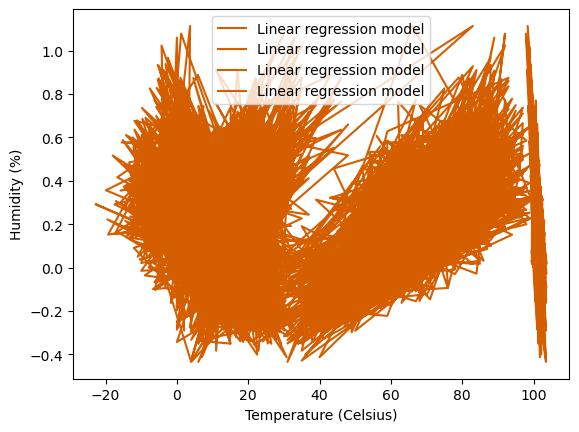

In [29]:
# plt.scatter(X_test[:, 0], Y_test, color=colors[0], label='Test data')
# plt.scatter(X_train[:, 0], Y_train, color=colors[1], label='Training data')
plt.plot(X_test, Y_pred_linear, color=colors[3], label='Linear regression model')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Humidity (%)')
plt.legend()
plt.savefig('Linear Regression OP.png')
plt.show()